In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import Sequential
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD


from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Deep_learning\DL_Assignments\Multiple CSV\7.xor.csv", header = None)

df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [3]:
df[2].value_counts()

-1.0    260
 1.0    240
Name: 2, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [22]:
df[2]=np.where(df[2]==-1.0,0,1)
df.head() 

,0,1,2
0,1.764052,0.400157,0
1,0.978738,2.240893,0
2,1.867558,-0.977278,1
3,0.950088,-0.151357,1
4,-0.103219,0.410599,1


<AxesSubplot:xlabel='0'>

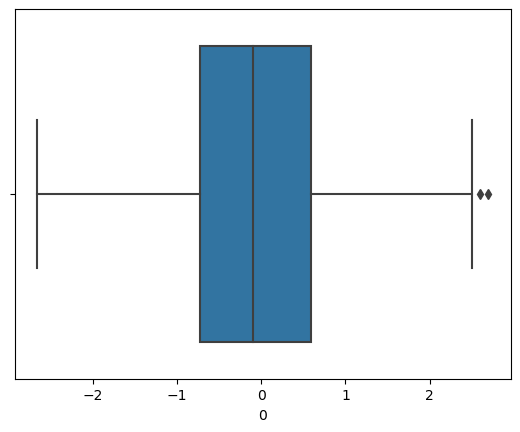

In [23]:
sns.boxplot(x = df[0])

<AxesSubplot:xlabel='1'>

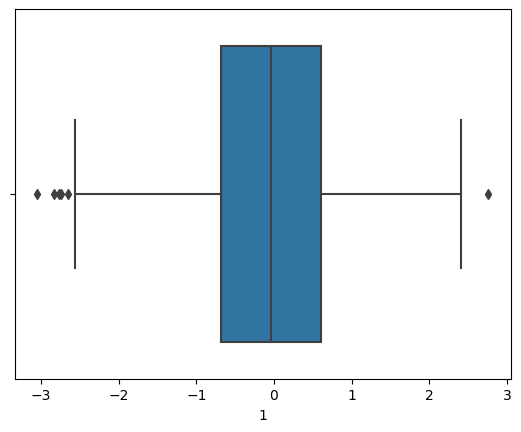

In [24]:
sns.boxplot(x = df[1])

In [25]:
x=df[[0,1]] 
y=df[2].astype(int) 

In [26]:
x.head()  

,0,1
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357
4,-0.103219,0.410599


In [27]:
y.head()  

0    0
1    0
2    1
3    1
4    1
Name: 2, dtype: int32

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)  

In [29]:
x_train.shape  

(450, 2)

In [30]:
x_test.shape 

(50, 2)

In [31]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

In [32]:
model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001))) 

In [33]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                60        
                                                                 
 dense_5 (Dense)             (None, 18)                378       
                                                                 
 dense_6 (Dense)             (None, 16)                304       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 759 (2.96 KB)
Trainable params: 759 (2.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=35,validation_split=0.1) 

Epoch 1/35
41/41 [==============================] - 1s 8ms/step - loss: 0.7235 - accuracy: 0.6173 - val_loss: 0.7043 - val_accuracy: 0.8222
Epoch 2/35
41/41 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.7778 - val_loss: 0.6792 - val_accuracy: 0.8444
Epoch 3/35
41/41 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.7728 - val_loss: 0.6601 - val_accuracy: 0.8667
Epoch 4/35
41/41 [==============================] - 0s 4ms/step - loss: 0.6697 - accuracy: 0.7802 - val_loss: 0.6451 - val_accuracy: 0.8222
Epoch 5/35
41/41 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.7753 - val_loss: 0.6314 - val_accuracy: 0.8222
Epoch 6/35
41/41 [==============================] - 0s 4ms/step - loss: 0.6430 - accuracy: 0.7951 - val_loss: 0.6197 - val_accuracy: 0.8000
Epoch 7/35
41/41 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.8099 - val_loss: 0.6061 - val_accuracy: 0.8000
Epoch 8/35
41/41 [==

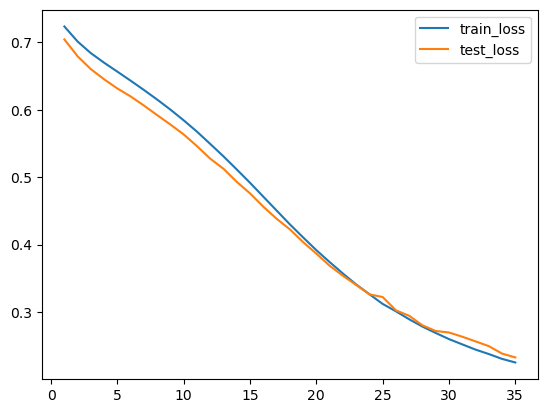

In [35]:
plt.plot(range(1,36),history.history["loss"],label="train_loss")
plt.plot(range(1,36),history.history["val_loss"],label="test_loss") 
plt.legend() 

In [36]:
predicted=model.predict(x_test) 
predicted 

2/2 [==============================] - 0s 3ms/step


array([[2.4533778e-02],
       [1.0212106e-01],
       [7.3243028e-01],
       [2.5122691e-02],
       [9.9344015e-01],
       [8.0366528e-01],
       [4.5745993e-01],
       [2.3870528e-01],
       [4.2664754e-01],
       [5.6683753e-02],
       [1.5060245e-01],
       [1.0923065e-01],
       [9.0601109e-02],
       [9.4315404e-01],
       [3.9010484e-02],
       [9.8997932e-03],
       [3.5553806e-02],
       [9.9120808e-01],
       [9.9643737e-01],
       [4.4160135e-04],
       [3.5663418e-02],
       [8.1188791e-02],
       [2.9392323e-01],
       [1.1545643e-01],
       [5.3235507e-01],
       [9.9991035e-01],
       [5.5222765e-02],
       [7.5212133e-01],
       [1.4346486e-01],
       [1.0718232e-01],
       [3.7373651e-02],
       [5.0117838e-01],
       [4.3058565e-01],
       [1.4927851e-01],
       [9.9881279e-01],
       [9.3994331e-01],
       [8.4434420e-01],
       [7.6719564e-01],
       [1.4149374e-02],
       [3.9654726e-01],
       [6.3329464e-01],
       [1.345793

In [37]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

0.94


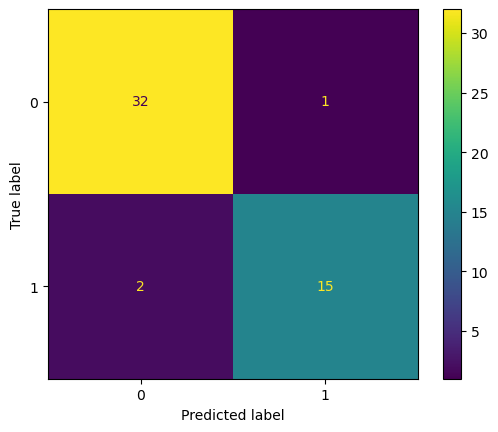

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

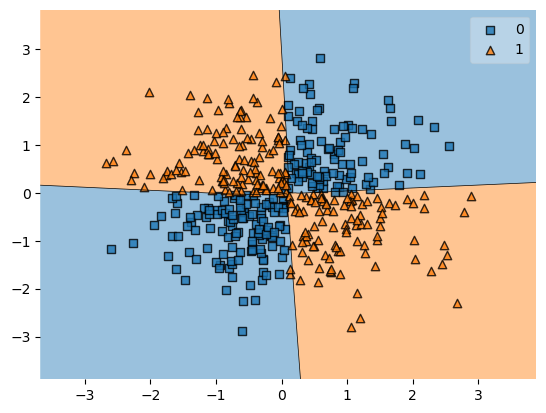

In [39]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

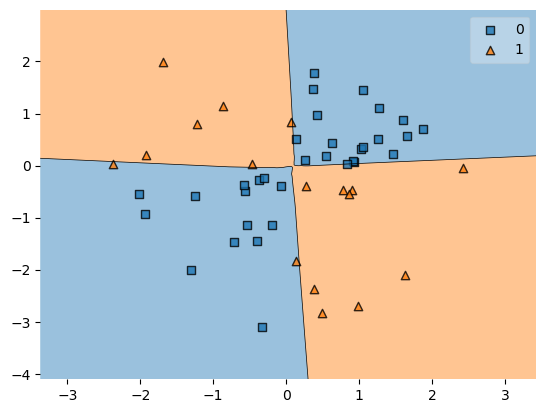

In [40]:
plot_decision_regions(x_test,y_test.values,clf=model) 